<a href="https://colab.research.google.com/github/Bindulekh/private/blob/main/M2_L5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Note: Import other packages as required by the tasks
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from nltk.tokenize import sent_tokenize, word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from gensim.models import Word2Vec

from nltk.cluster import KMeansClusterer
import nltk

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install openpyxl

In [8]:
df=pd.read_excel("/content/sample.xlsx", usecols=['sentiment','review'])
df.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


## Below is the complete code for sentiment analysis using Word2Vec Model

# **1.Text Pre-Processing**

In [9]:
df=df.loc[df.review.str.isnumeric()==False]

### 1.1 Lower Casing

In [11]:
# Convert the titles to lowercase
df['review_processed'] = df['review'].map(lambda x: x.lower())
df[['review','review_processed']].head()

,review,review_processed
0,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...
1,"\The Classic War of the Worlds\"" by Timothy Hi...","\the classic war of the worlds\"" by timothy hi..."
2,The film starts with a manager (Nicholas Bell)...,the film starts with a manager (nicholas bell)...
3,It must be assumed that those who praised this...,it must be assumed that those who praised this...
4,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious 8...


### 1.2 Tokenization

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
from nltk.tokenize import word_tokenize
#Word tokenization
df.loc[:,'review_processed_1'] =df['review_processed'].apply(lambda x : word_tokenize(x))

df[['review_processed','review_processed_1']].head()

,review_processed,review_processed_1
0,with all this stuff going down at the moment w...,"[with, all, this, stuff, going, down, at, the,..."
1,"\the classic war of the worlds\"" by timothy hi...","[\the, classic, war, of, the, worlds\, '', by,..."
2,the film starts with a manager (nicholas bell)...,"[the, film, starts, with, a, manager, (, nicho..."
3,it must be assumed that those who praised this...,"[it, must, be, assumed, that, those, who, prai..."
4,superbly trashy and wondrously unpretentious 8...,"[superbly, trashy, and, wondrously, unpretenti..."


### 1.3 Punctuation Removal

In [14]:
import string
#Function for punctuation removal
def remove_punct(tok):
    y = [x for x in tok if x not in string.punctuation]
    return y

#Removing punctuation
df.loc[:,'review_processed_2'] =df['review_processed_1'].apply(remove_punct)

df[['review_processed_1','review_processed_2']].head(2)

,review_processed_1,review_processed_2
0,"[with, all, this, stuff, going, down, at, the,...","[with, all, this, stuff, going, down, at, the,..."
1,"[\the, classic, war, of, the, worlds\, '', by,...","[\the, classic, war, of, the, worlds\, '', by,..."


### 1.4 Lemmatization

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(tok):
    newtoken =[lemmatizer.lemmatize(i) for i in tok]
    return newtoken

df.loc[:,'review_processed_3'] =df['review_processed_2'].apply(lemma)

df[['review_processed_2','review_processed_3']].head()

,review_processed_2,review_processed_3
0,"[with, all, this, stuff, going, down, at, the,...","[with, all, this, stuff, going, down, at, the,..."
1,"[\the, classic, war, of, the, worlds\, '', by,...","[\the, classic, war, of, the, worlds\, '', by,..."
2,"[the, film, starts, with, a, manager, nicholas...","[the, film, start, with, a, manager, nicholas,..."
3,"[it, must, be, assumed, that, those, who, prai...","[it, must, be, assumed, that, those, who, prai..."
4,"[superbly, trashy, and, wondrously, unpretenti...","[superbly, trashy, and, wondrously, unpretenti..."


### 1.5 Stop Words Removal

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Function for stop words removal
def rem_stop_words(tok):
      clean=tok[:]
      for word in clean:
           if word in stop_words:
                clean.remove(word)
      return clean

#Stop words removal
df.loc[:,'review_processed_4'] =df['review_processed_3'].apply(rem_stop_words)

df[['review_processed_3','review_processed_4']].head()

,review_processed_3,review_processed_4
0,"[with, all, this, stuff, going, down, at, the,...","[stuff, going, moment, mj, 've, started, liste..."
1,"[\the, classic, war, of, the, worlds\, '', by,...","[\the, classic, war, worlds\, '', timothy, hin..."
2,"[the, film, start, with, a, manager, nicholas,...","[film, start, manager, nicholas, bell, giving,..."
3,"[it, must, be, assumed, that, those, who, prai...","[must, assumed, those, praised, film, \the, gr..."
4,"[superbly, trashy, and, wondrously, unpretenti...","[superbly, trashy, wondrously, unpretentious, ..."


In [21]:
#Converting list of words to sentences from previous step
df['review_processed_5']=df['review_processed_4'].map(lambda x: ' '.join(x))

# 2. Train and Test Split

In [22]:
from sklearn.model_selection import train_test_split

# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.2, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(df[['review_processed_4', 'review_processed',]],
                                                        df['sentiment'],
                                                        shuffle=shuffle_state,
                                                        test_size=test_size,
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())

    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df)

Value counts for Train sentiments
sentiment
1    10018
0     9982
Name: count, dtype: int64
Value counts for Test sentiments
sentiment
0    2518
1    2482
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index                                 review_processed_4  \
0   4297  [ok, let, 's, get, clear, 'm, really, sci-fi, ...   
1  22252  [paul, naschy, made, great, number, horror, fi...   
2  10447  [small, funny, film, totally, incredible, unbe...   
3  11499  [movie, capture, absurd, essence, an, overbear...   
4  23167  ['m, actually, surprised, amount, good, rating...   

                                    review_processed  
0  ok, let's get this clear. i'm really not into ...  
1  paul naschy made a great number of horror film...  
2  a small funny film. it is totally incredible, ...  
3  this movie captures the absurd essence of an o...  
4  i'm actually surprised at the amount of good r...  


NOTE :- As you would observe, the classes are unbalanced, when we will train the model we will consider class_weight as balanced.

# 3. Generating Word2Vec Model

In [23]:
from gensim.models import Word2Vec

# Skip-gram model. Below parameters have been selected after doing cross validation
size_dim = 100 # Default number of dimensions of the embeddings. So no need to add separatley
window = 3 #Maximum distance between a target word and words around the target word
min_count = 10 #Minimum count of words considered while training the model, words with lesser occurence will be ignored
sg = 1 #for skip gram model = 1 and for  CBOW =0
review_product_processed = pd.Series(df['review_processed_4']).values


# Train the Word2Vec Model
w2v_model = Word2Vec(review_product_processed,vector_size=100, min_count = min_count, workers = 4, window = window, sg = sg)

In [24]:
w2v_model.wv['movie']

array([-0.36905035,  0.14352837,  0.07152726,  0.01474548, -0.07255489,
       -0.21225585,  0.27163142,  0.5409914 , -0.1126477 , -0.49140963,
        0.12020299, -0.14951068, -0.13789764,  0.2702069 , -0.21478596,
       -0.02546844,  0.28525883,  0.25319552, -0.1647824 , -0.57075816,
       -0.26087853,  0.1560225 ,  0.40867966, -0.19055115, -0.25798872,
       -0.06189793, -0.46391264, -0.23905598,  0.06403661,  0.32529706,
        0.20903377,  0.15459126,  0.1683057 , -0.12653413, -0.04101637,
        0.08673708, -0.10886964, -0.17020154, -0.14848171, -0.29784915,
        0.6308636 , -0.13478853, -0.11708223, -0.26012316,  0.31410623,
        0.06044835, -0.4232535 ,  0.33282724,  0.08737554, -0.0540558 ,
        0.10598022, -0.6669625 , -0.2390259 , -0.04735867, -0.4196791 ,
        0.20865913,  0.371908  ,  0.2135512 , -0.22162108,  0.06853884,
       -0.03278654,  0.16206224,  0.01334223, -0.09267703,  0.07392161,
        0.22775945,  0.0314911 ,  0.18756658, -0.43186766,  0.12

In [25]:
# Store the vectors for train data in following file
OUTPUT_FOLDER="/content/sample_data"


word2vec_filename = OUTPUT_FOLDER + 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        # Taking average of vectors in a sentence. This will create an average array that captures the sentiment of the sentence
        model_vector = (np.mean([w2v_model.wv[token] for token in row['review_processed_4'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")

        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

# 4. Model Training

In [28]:
# Load file in which features are stored
word2vec_df = pd.read_csv(r"/content/sample_datatrain_review_word2vec.csv")
word2vec_df=word2vec_df.fillna(0)

In [29]:
# This dataframe consist of average of reviews
word2vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.172287,0.302575,0.055703,0.064557,0.008839,-0.141727,0.103035,0.438509,-0.183538,-0.217345,...,0.216727,-0.054329,0.036011,-0.020793,0.296586,0.090962,0.100646,-0.125984,-0.038898,0.132606
1,-0.136328,0.270241,0.048216,0.083877,-0.017068,-0.155943,0.119407,0.404829,-0.121900,-0.199394,...,0.180229,0.006207,0.068080,-0.020619,0.273401,0.018310,0.049272,-0.224106,0.038809,0.136372
2,-0.181538,0.329905,0.021210,0.063633,-0.040201,-0.189236,0.075512,0.445062,-0.158004,-0.269101,...,0.174468,0.011423,0.041122,-0.013968,0.327461,0.102650,0.084649,-0.110644,-0.005024,0.069960
3,-0.130103,0.272922,0.103994,0.025736,-0.027733,-0.181292,0.001978,0.431297,-0.152537,-0.265007,...,0.146958,-0.036964,0.054796,-0.029482,0.307317,0.017467,0.054810,-0.121264,-0.011267,0.146326
4,-0.144383,0.339936,0.030474,0.018453,-0.033627,-0.177981,0.109246,0.388031,-0.183573,-0.297627,...,0.233777,0.022133,0.074321,0.023777,0.261310,0.043200,0.037251,-0.072828,0.013693,0.087340


In [30]:
import time

#Import the DecisionTreeeClassifier
from sklearn.ensemble import RandomForestClassifier

#Initialize the model
clf_decision_word2vec = RandomForestClassifier(
n_estimators= 80,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 12,
 criterion= 'entropy',
 bootstrap= True,
class_weight='balanced')

start_time = time.time()

# Fit the model
clf_decision_word2vec.fit(word2vec_df, Y_train['sentiment'])
print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

Time taken to fit the model with word2vec vectors: 23.420660495758057


### Performance on Train Set

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

train_features = []

for index, row in X_train.iterrows():

    vector = np.mean([w2v_model.wv[token] for token in row['review_processed_4'] if token in w2v_model.wv.key_to_index], axis=0)

    if type(vector) is np.ndarray:
        train_features.append(vector)
    else:
        train_features.append(np.array([0 for i in range(100)]))

train_predictions = clf_decision_word2vec.predict(train_features)

print(classification_report(Y_train['sentiment'],train_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9982
           1       0.98      0.97      0.98     10018

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



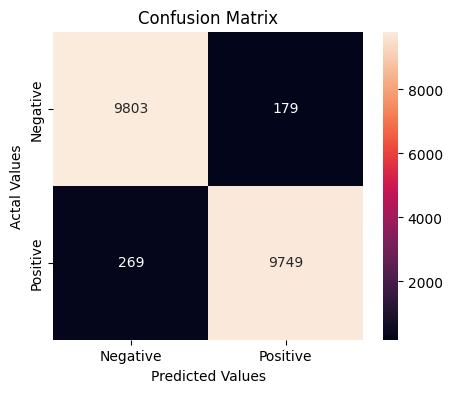

In [32]:
cm = confusion_matrix(Y_train['sentiment'],train_predictions)
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive'],
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


### Performance on Test Set

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_features = []

for index, row in X_test.iterrows():

    vector = np.mean([w2v_model.wv[token] for token in row['review_processed_4'] if token in w2v_model.wv.key_to_index], axis=0)

    if type(vector) is np.ndarray:
        test_features.append(vector)
    else:
        test_features.append(np.array([0 for i in range(100)]))

test_predictions = clf_decision_word2vec.predict(test_features)

print(classification_report(Y_test['sentiment'],test_predictions))


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2518
           1       0.82      0.84      0.83      2482

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



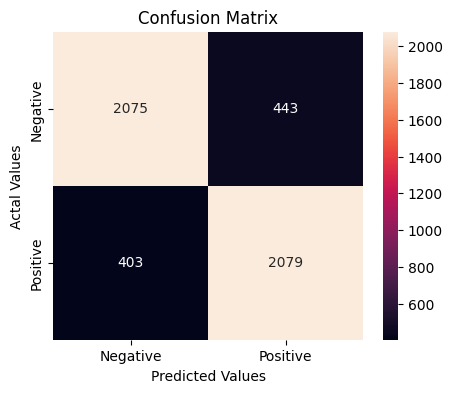

In [34]:
cm = confusion_matrix(Y_test['sentiment'],test_predictions)
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Positive'],
                     columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()